# Cat Detector using Resnet-based YOLO

## Demo

In [1]:
%matplotlib inline
import torch
import os

from model import catdetector
from utils import detect

In [2]:
if not os.path.exists('catdetector.pkl'):
    os.system("wget https://s3.amazonaws.com/cat-detector/catdetector.pkl")
catdetector.load_state_dict(torch.load('catdetector.pkl'))
# set model to eval mode
_ = catdetector.eval()

Meet Sylvia, the supervisor of this project!

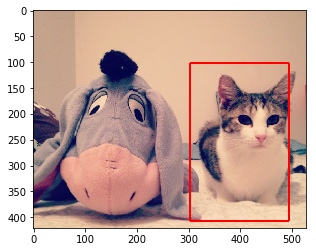

In [3]:
image_name = 'imgs/example1.jpg'
bboxes = detect(image_name, catdetector)

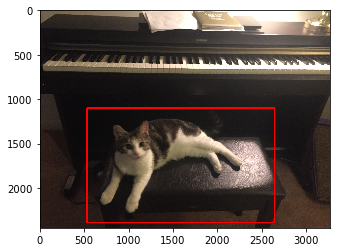

In [4]:
image_name = 'imgs/example2.jpg'
bboxe = detect(image_name, catdetector)

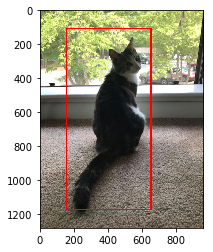

In [5]:
image_name = 'imgs/example3.jpg'
bboxes = detect(image_name, catdetector)

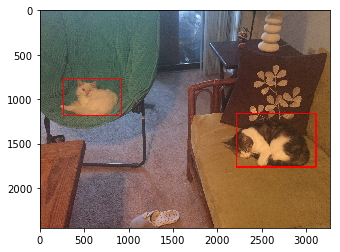

In [6]:
image_name = 'imgs/example4.jpg'
bboxes = detect(image_name, catdetector)

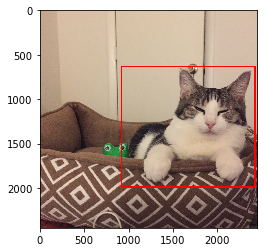

In [7]:
image_name = 'imgs/example5.jpg'
bboxes = detect(image_name, catdetector)

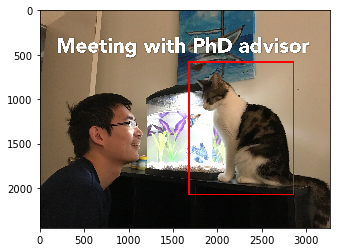

In [8]:
image_name = 'imgs/example6.jpg'
bboxes = detect(image_name, catdetector)

## Model Reivew

The model uses the same idea as [YOLO version1](https://arxiv.org/abs/1506.02640), with the following differences:

* ResNet is used as the feature extractor instead of InceptionNet.

* Fully connected layers are removed, so the model is fully convolutional.

* Different weights for bbox coordinates and confidence from the original YOLO paper.

More specifically, the image is first resized to 448-by-448 and divided into 7-by-7 cells. Each cell is responsible for predicting one bouding box. In the example below, the cell on the 5th row and 6th column is responsible for the final bouding box. Each predicted bounding box contains the center coordinates (x and y), the width (w) and height (h), and the confidence of box (c).

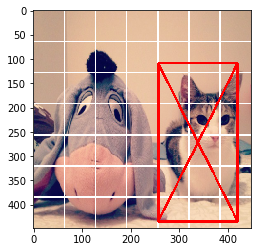

In [9]:
image_name = 'imgs/example1.jpg'
bboxes = detect(image_name, catdetector, showgrid=True)

Only bounding boxes with confidence over than some thresholds are shown. This can be adjusted through c_threshold.

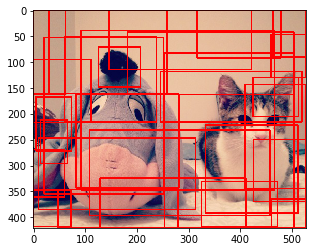

In [10]:
image_name = 'imgs/example1.jpg'
bboxes = detect(image_name, catdetector, c_threshold=0.01)